## Manipulação dos arquivos

In [1292]:
import pandas as pd

# Arquivos de entrada referente a chuva
taioChuva = pd.read_fwf('txt\83050000TAIÓ_2962005-1442014-chuva.txt', header=None)
ituporangaChuva = pd.read_fwf('txt\83250000ITUPORANGA_3172005-1442014-chuva.txt', header=None)
riodosulChuva = pd.read_fwf('txt\83300200RIODOSUL-NOVO_2862005-1442014-Chuva.txt', header=None)

#TRASNFORMAÇÃO CHUVA - Inserindo header com a data e a chuva, e removido o indice 0 do dataframe (que continha o cabeçalho do arquivo original) 
taioChuva.columns = ['Data', 'Chuva Taio']
taioChuva = taioChuva.drop(taioChuva.index[0])

ituporangaChuva.columns = ['Data', 'Chuva Ituporanga']
ituporangaChuva = ituporangaChuva.drop(ituporangaChuva.index[0])

riodosulChuva.columns = ['Data', 'Chuva Rio do Sul']
riodosulChuva = riodosulChuva.drop(riodosulChuva.index[0])


In [1293]:
# Arquivos de entrada referente ao nível
taioNivel = pd.read_fwf('txt\83050000TAIÓ_2962005-1442014-nível.txt', header=None)
ituporangaNivel = pd.read_fwf('txt\83250000ITUPORANGA_2962005-1032014-nível.txt', header=None)
riodosulNivel = pd.read_fwf('txt\83300200RIODOSUL-NOVO_2982005-1422014 -nível.txt', header=None)

#TRASNFORMAÇÃO NIVEL - Inserindo header com a data e a chuva, e removido o indice 0 do dataframe (que continha o cabeçalho do arquivo original) 
taioNivel.columns = ['Data', 'Nivel Taio']
taioNivel = taioNivel.drop(taioNivel.index[0])

ituporangaNivel.columns = ['Data', 'Nivel Ituporanga']
ituporangaNivel = ituporangaNivel.drop(ituporangaNivel.index[0])

riodosulNivel.columns = ['Data', 'Nivel Rio do Sul']
riodosulNivel = riodosulNivel.drop(riodosulNivel.index[0])


In [1294]:
#Juntando os dataframes afins de chuvas
chuva1 = pd.merge(taioChuva, ituporangaChuva, how='inner', on = 'Data')
chuva = pd.merge(chuva1, riodosulChuva, how='inner', on = 'Data')

#TRANSFORMAÇÃO CHUVA - Removendo as linhas que são nulas
chuva.dropna(inplace=True)


In [1295]:
#Juntando os dataframes afins de niveis
nivel1 = pd.merge(taioNivel, ituporangaNivel, how='inner', on = 'Data')

nivel = pd.merge(nivel1, riodosulNivel, how='inner', on = 'Data')

#TRANSFORMAÇÃO NIVEL - Removendo as linhas que são nulas
nivel.dropna(inplace=True)


In [1296]:
#Juntando os dataframes de chuvas e niveis
cheias = pd.merge(chuva, nivel, how = 'inner', on = 'Data')
cheias.to_csv('cheias.csv', index=False)
cheias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66957 entries, 0 to 66956
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Data              66957 non-null  object
 1   Chuva Taio        66957 non-null  object
 2   Chuva Ituporanga  66957 non-null  object
 3   Chuva Rio do Sul  66957 non-null  object
 4   Nivel Taio        66957 non-null  object
 5   Nivel Ituporanga  66957 non-null  object
 6   Nivel Rio do Sul  66957 non-null  object
dtypes: object(7)
memory usage: 4.1+ MB


In [1297]:
#Conversão dos tipos de dados de objetos para numericos

cheias['Chuva Taio'] = cheias['Chuva Taio'].astype(float)
cheias['Chuva Ituporanga'] = cheias['Chuva Ituporanga'].astype(float)
cheias['Chuva Rio do Sul'] = cheias['Chuva Rio do Sul'].astype(float)

cheias['Nivel Taio'] = cheias['Nivel Taio'].astype(int)
cheias['Nivel Ituporanga'] = cheias['Nivel Ituporanga'].astype(int)
cheias['Nivel Rio do Sul'] = cheias['Nivel Rio do Sul'].astype(int)


#Conversao de data para data time
cheias['Data'] = pd.to_datetime(cheias['Data'])

cheias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66957 entries, 0 to 66956
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              66957 non-null  datetime64[ns]
 1   Chuva Taio        66957 non-null  float64       
 2   Chuva Ituporanga  66957 non-null  float64       
 3   Chuva Rio do Sul  66957 non-null  float64       
 4   Nivel Taio        66957 non-null  int32         
 5   Nivel Ituporanga  66957 non-null  int32         
 6   Nivel Rio do Sul  66957 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 3.3 MB


## Analise dos dados


Em um primeiro momento vamos gerar uma analise em cima dos dados filtrados acima, para entender melhor os mesmos. O objetivo é motar um modelo para prever o nivel do rio de Rio do Sul.

In [1298]:
x = cheias[['Chuva Taio', 'Chuva Ituporanga', 'Chuva Rio do Sul', 'Nivel Taio', 'Nivel Ituporanga']]
y = cheias[['Nivel Rio do Sul']] 

In [1299]:
# IMPORTAÇÃO DOS MODULOS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
import numpy as np


In [1300]:
# Vamos gerar os modelos de treiamento
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)


In [1301]:
# Vamos gerar o modelo de regressão multipla
regressaoMultipla = LinearRegression()
regressaoMultipla.fit(x_train, y_train)

y_previsto = regressaoMultipla.predict(x_test)

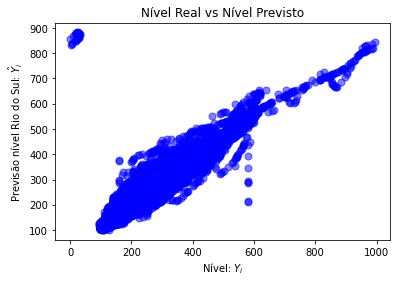

In [1302]:
# Para se ter uma melhor visualização, vamos gerar um gráfico de nivel real vs previsto

plt.scatter(y_test, y_previsto, c = 'b',  s = 50, alpha = 0.5)

plt.xlabel("Nível: $Y_i$")
plt.ylabel("Previsão nível Rio do Sul: $\hat{Y}_i$")
plt.title("Nível Real vs Nível Previsto")

plt.show()

Ao analizar o grafico podemos perceber um certo agrupamento distante, e uma possivel correlação positiva 

In [1303]:
# Para melhor analizar a correlação entre as variáveis ​​no dataframe, vamos plotar uma tabela de correlações.
corr = cheias.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


C:\Users\rafin\AppData\Local\Temp\ipykernel_24508\1665452475.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Chuva Taio,Chuva Ituporanga,Chuva Rio do Sul,Nivel Taio,Nivel Ituporanga,Nivel Rio do Sul
Chuva Taio,1.00,0.19,0.19,0.01,0.01,0.00
Chuva Ituporanga,0.19,1.00,0.33,0.03,0.05,0.03
Chuva Rio do Sul,0.19,0.33,1.00,0.04,0.05,0.04
Nivel Taio,0.01,0.03,0.04,1.00,0.81,0.91
Nivel Ituporanga,0.01,0.05,0.05,0.81,1.00,0.84
Nivel Rio do Sul,0.00,0.03,0.04,0.91,0.84,1.00


Como podemos ver na tabela o nível de Rio do Sul tem uma grande correlação com os níveis do rio de Taio e Ituporanga.

In [1304]:
# Logo, vamos treinar nosso modelo tendo em vista a correlação entre as variáveis
x = cheias[["Nivel Taio", "Nivel Ituporanga"]]
y = cheias[["Nivel Rio do Sul"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)


In [1305]:
regressaoMultipla = LinearRegression()
regressaoMultipla.fit(x_train, y_train)

y_previsto = regressaoMultipla.predict(x_test)


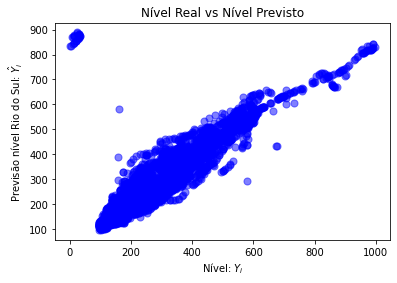

In [1306]:
# Vamos gerar um grafico de previsão para verificar as mudanças
plt.scatter(y_test, y_previsto, c = 'b',  s = 50, alpha = 0.5)

plt.xlabel("Nível: $Y_i$")
plt.ylabel("Previsão nível Rio do Sul: $\hat{Y}_i$")
plt.title("Nível Real vs Nível Previsto")

plt.show()


Como podemos ver ainda permanece um certo agrupamento fora da linha, para melhorar isto vamos aplicar mais algumas correções nos dados das cheias

In [1307]:
# Por meio destes vamos remover as linhas que não tem nível maior que 90 (em Rio do Sul) e que não tem data maior que 2011-01-01
nivelMenor = cheias[(cheias['Nivel Rio do Sul'] < 90)].index
cheias.drop(nivelMenor, inplace = True)

dataMaior = cheias[(cheias['Data'] < '2011-01-01 00:00:00')].index
cheias.drop(dataMaior, inplace = True)


In [1308]:
# Vamos treinar novamente nosso modelo
x = cheias[["Nivel Taio", "Nivel Ituporanga"]]
y = cheias[["Nivel Rio do Sul"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

regressaoMultipla = LinearRegression()
regressaoMultipla.fit(x_train, y_train)

y_previsto = regressaoMultipla.predict(x_test)

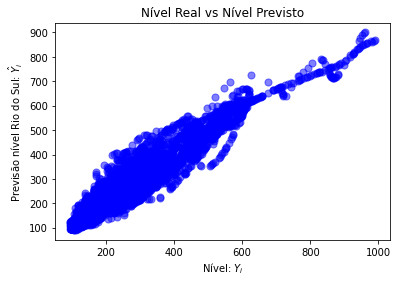

In [1309]:
# Vamos gerar um grafico de previsão para verificar as mudanças
plt.scatter(y_test, y_previsto, c = 'b',  s = 50, alpha = 0.5)

plt.xlabel("Nível: $Y_i$")
plt.ylabel("Previsão nível Rio do Sul: $\hat{Y}_i$")
plt.title("Nível Real vs Nível Previsto")

plt.show()


Podemos verificar que o modelo ja ficou mais ajustado para a previsão, vamos ver como ficou o R2 e o R2 ajustado

In [1310]:
# R2
R2 = r2_score(y_test,y_previsto)
print(R2)

0.9396815674682331


In [1311]:
# R2 ajustado
adj_r2 = (1 - ((1 - r2_score(y_test, y_previsto)) * (len(y_test) - 1)) / (len(y_test) - x_train.shape[1] - 1))
print(adj_r2)

0.9396724922508206


Como forma de mostrar a acuracia do nosso modelo, vamos gerar o erro percentual absoluto medio ou MAPE

In [1313]:
mape = np.mean(np.abs((y_test - y_previsto) / y_test)) * 100

print("Valor do MAPE %.2f" %mape + "%")

Valor do MAPE 8.66%


c:\Users\rafin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Logo, o modelo desenvolvido consegue em média, fazer previsões que erram em 8.66% do valor real.